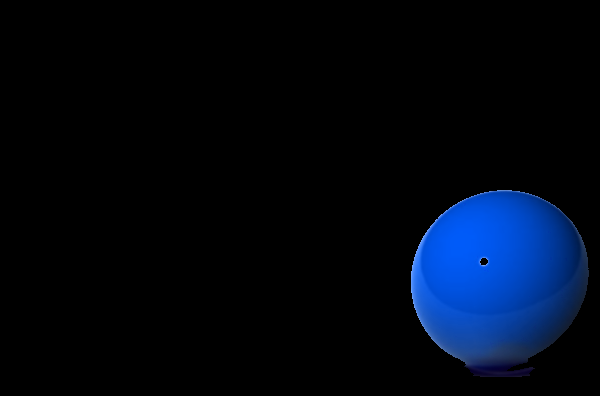

In [4]:
import cv2
import numpy as np
from PIL import Image

def RGB2BGR(image):
    image1=np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            image1[i][j][0]=image[i][j][2]
            image1[i][j][1]=image[i][j][1]
            image1[i][j][2]=image[i][j][0]
    return image1

def masking_image(image,lower,upper):
    image_copy=image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask=np.zeros((image.shape[0],image.shape[1],image.shape[2]),dtype=np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i][j][0] >= lower[0] and image[i][j][1] >= lower[1] and image[i][j][2] >= lower[2] and image[i][j][0] <= upper[0] and image[i][j][1] <= upper[1] and image[i][j][2] <= upper[2]:
                    mask[i][j][0] = image[i][j][0]
                    mask[i][j][1] = image[i][j][1]
                    mask[i][j][2] = image[i][j][2]
    image=np.bitwise_and(mask,image)
    image= cv2.cvtColor(image, cv2.COLOR_HSV2RGB)
    
    return image

def convolve3d(image, kernel):
    output = np.zeros_like(image)
    image_padded = np.zeros((image.shape[0]+kernel.shape[0]-1,image.shape[1] + kernel.shape[1]-1,image.shape[2]))
    image_padded[kernel.shape[0]-2:-1:,kernel.shape[1]-2:-1:,:] = image
    image_padded[0,0,:]=image[0,0,:]
    image_padded[-1,-1,:]=image[-1,-1,:]
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            for z in range(image.shape[2]):
                output[y,x,z]=(kernel * image_padded[y: y+kernel.shape[0], x: x+kernel.shape[1],z]).sum()
    return output

gaussian_blurr=np.array([[1,  4,  6,  4, 1],
                         [4, 16, 24, 16, 4],
                         [6, 24, 36, 24, 6],
                         [4, 16, 24, 16, 4],
                         [1,  4,  6,  4, 1]])/256

file_name="mask (1).png"
im = np.array(Image.open(file_name))
lower_blue = np.array([94,130,38])
upper_blue = np.array([179,255,255])
im=RGB2BGR(im)
im=masking_image(convolve3d(im,gaussian_blurr),lower_blue,upper_blue)
pil_img=Image.fromarray(im.astype(np.uint8))
pil_img.save('mask.png')
Image.open('mask.png')